#LLM used for code generation on the playground: Gemma2-9b-it

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('household_power_consumption.csv',
                 sep=';',
                 parse_dates={'datetime': ['Date', 'Time']},
                 infer_datetime_format=True,
                 na_values=['?'],
                 low_memory=False)

/tmp/ipython-input-2-2428235778.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('household_power_consumption.csv',
/tmp/ipython-input-2-2428235778.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('household_power_consumption.csv',
/tmp/ipython-input-2-2428235778.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('household_power_consumption.csv',


In [3]:
df = df.dropna()

In [4]:
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

In [5]:
df.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0


In [ ]:
"""
First prompt:
You are a coding assistant that writes Python pandas code for analyzing time-series data.
The dataset I am using is the UCI Household Power Consumption dataset.
It has already been preprocessed and loaded into a pandas dataframe named `df`.
The dataframe is indexed by a datetime index called `datetime`.
Columns include:
- 'Global_active_power' (float, in kilowatts)
- 'Voltage'
- 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'
Write clean, correct, and well-commented Python code that can be executed in a Jupyter notebook.
Do NOT include any text explanation, just return the code block.
"""

##What was the average active power consumption in March 2007

In [6]:
"""
Prompt for model: Write pandas code to calculate the average of `Global_active_power` for all rows where the datetime index is in March 2007.
The dataframe `df` is already indexed by datetime.
Make sure to use bitwise operators (`&`) for combining the conditions, and wrap each condition in parentheses.
Return only the code block, no explanation.

"""
df.loc[pd.to_datetime('2007-03-01'):pd.to_datetime('2007-03-31')]['Global_active_power'].mean()

np.float64(1.2813209259259262)

In [7]:
#to check
print(df.loc[(df.index.month == 3) & (df.index.year == 2007), 'Global_active_power'])

datetime
2007-03-01 00:00:00    0.226
2007-03-01 00:01:00    0.222
2007-03-01 00:02:00    0.218
2007-03-01 00:03:00    0.220
2007-03-01 00:04:00    0.220
                       ...  
2007-03-31 23:55:00    3.466
2007-03-31 23:56:00    3.438
2007-03-31 23:57:00    3.324
2007-03-31 23:58:00    3.308
2007-03-31 23:59:00    3.726
Name: Global_active_power, Length: 44639, dtype: float64


##What hour of the day had the highest power usage on Christmas 2006?

In [ ]:
'''
Prompt for the model: Write pandas code to find the hour of the day with the highest total `Global_active_power` on December 25, 2006.
Details to follow carefully:
- The dataframe is called `df`, and it is already indexed by datetime (`datetime` is the index).
- Filter `df` for rows where the datetime index date equals `datetime.date(2006,12,25)` (note: compare with a `datetime.date` object, not a string).
- After filtering, resample the filtered data by hour (`'h'`) and sum `Global_active_power` for each hour.
- Find and print the hour (timestamp) with the maximum total power usage, and also print the corresponding total power.
- Use only pandas and the standard `datetime` module.
- Also import the date from datetime module
Return only the code block, no explanations
'''
from datetime import date

df_dec25 = df[df.index.date == date(2006,12,25)]
hourly_power = df_dec25.resample('h').sum()
max_power_hour = hourly_power['Global_active_power'].idxmax()
max_power = hourly_power['Global_active_power'].max()
print(max_power_hour)
print(max_power)

2006-12-25 22:00:00
252.892


In [ ]:
#to check, here we can see that 22:00:00 the value of Global active power variable is highest value 252.892
print(hourly_power)

                     Global_active_power  Global_reactive_power   Voltage  \
datetime                                                                    
2006-12-25 00:00:00               59.974                  7.708  14646.39   
2006-12-25 01:00:00               72.406                  6.114  14680.47   
2006-12-25 02:00:00               26.280                  7.398  14912.18   
2006-12-25 03:00:00               35.398                  4.422  14896.91   
2006-12-25 04:00:00               34.720                  3.280  14923.76   
2006-12-25 05:00:00               37.206                  8.404  14885.68   
2006-12-25 06:00:00               15.844                  4.148  14820.23   
2006-12-25 07:00:00               40.608                  3.300  14603.53   
2006-12-25 08:00:00              156.666                 11.328  14543.95   
2006-12-25 09:00:00               89.608                 10.936  14651.26   
2006-12-25 10:00:00              114.940                 15.926  14539.03   

##Compare energy usage (Global_active_power) on weekdays vs weekends.

In [ ]:
'''
Prompt to the LLM: Write pandas code to compare the average `Global_active_power` on weekdays versus weekends.

Details to follow carefully:
- The dataframe is named `df`, and it is already indexed by datetime (`datetime` is the index).
- Add a new column called `day_of_week` that contains the day of the week for each row, where Monday=0 and Sunday=6.
- Then add another column called `week_type` which contains either `'Weekday'` (if `day_of_week` is 0–4) or `'Weekend'` (if `day_of_week` is 5–6).
- Group the dataframe by `week_type` and calculate the mean of `Global_active_power` for each group.
- Print the resulting averages with appropriate labels.

Return only the full, correct code block — no explanations or comments.
'''
df['day_of_week'] = df.index.weekday
df['week_type'] = pd.cut(df['day_of_week'], bins=[0, 4, 6], labels=['Weekday', 'Weekend'])
average_power = df.groupby('week_type')['Global_active_power'].mean()
print(average_power)

week_type
Weekday    1.060306
Weekend    1.275371
Name: Global_active_power, dtype: float64


In [ ]:
df.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day_of_week,week_type
datetime,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,5,Weekend
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,5,Weekend
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,5,Weekend
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,5,Weekend
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,5,Weekend
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0,5,Weekend
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0,5,Weekend
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0,5,Weekend
2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0,5,Weekend


In [ ]:
#to check
print(df['week_type'].unique())

['Weekend', NaN, 'Weekday']
Categories (2, object): ['Weekday' < 'Weekend']


In [ ]:
weekdays_df = df[df['week_type'] == 'Weekday']
print(weekdays_df)

                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-19 00:00:00                0.414                  0.242   241.19   
2006-12-19 00:01:00                0.504                  0.326   241.50   
2006-12-19 00:02:00                0.408                  0.234   241.77   
2006-12-19 00:03:00                0.416                  0.224   242.35   
2006-12-19 00:04:00                0.394                  0.214   241.84   
...                                  ...                    ...      ...   
2010-02-12 23:55:00                0.250                  0.054   246.47   
2010-02-12 23:56:00                0.250                  0.054   247.12   
2010-02-12 23:57:00                0.248                  0.054   246.35   
2010-02-12 23:58:00                0.250                  0.054   247.28   
2010-02-12 23:59:00                0.250                  0.054   246.78   

           

In [ ]:
weekdays_df = df[df['week_type'] == 'Weekend']
print(weekdays_df)

                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   
...                                  ...                    ...      ...   
2010-02-14 11:03:00                1.458                  0.076   241.57   
2010-02-14 11:04:00                1.456                  0.076   241.74   
2010-02-14 11:05:00                1.448                  0.078   241.29   
2010-02-14 11:06:00                1.442                  0.078   240.45   
2010-02-14 11:07:00                1.468                  0.076   242.40   

           

In [ ]:
# Hence we can see The week_type column correctly classifies dates into Weekday and Weekend (validated using df['week_type'].unique() and sample rows).
# The calculated averages are approximately  1.060306 kW for Weekdays and 1.275371 kW for Weekends

##Find days where energy consumption exceeded 5 kWh.

In [ ]:
'''
Prompt given to the LLM: Write pandas code to find all dates where the total daily `Global_active_power` exceeded 5 kilowatt-hours.

Details:
- The dataframe is named `df` and is already indexed by datetime (`datetime` is the index).
- Resample `Global_active_power` by day (`'D'`) and sum up the daily totals.
- Store the resulting daily totals in a variable named `daily_usage`.
- Then create a new variable named `high_usage_days` which contains only the dates and total power where the daily total exceeds 5.
- Finally, print `high_usage_days`.

Return only the full, correct code block — no explanations.
'''

daily_usage = df['Global_active_power'].resample('D').sum()
high_usage_days = daily_usage[daily_usage > 5]
print(high_usage_days)

datetime
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
                ...   
2010-02-10    1944.542
2010-02-11    1369.768
2010-02-12    1892.998
2010-02-13    2351.556
2010-02-14     434.402
Name: Global_active_power, Length: 1154, dtype: float64


In [ ]:
#to check: Verified that all dates listed in high_usage_days have total daily Global_active_power ≥ 5 kWh, with minimum value confirmed 14.218
print(high_usage_days.describe())

count    1154.000000
mean     1594.119527
std       633.482505
min        14.218000
25%      1176.892000
50%      1575.725000
75%      1959.245500
max      4773.386000
Name: Global_active_power, dtype: float64


In [ ]:
print(f"Minimum value in high_usage_days: {high_usage_days.min()}")

Minimum value in high_usage_days: 14.218


##Plot the energy usage trend for the first week of January 2007.

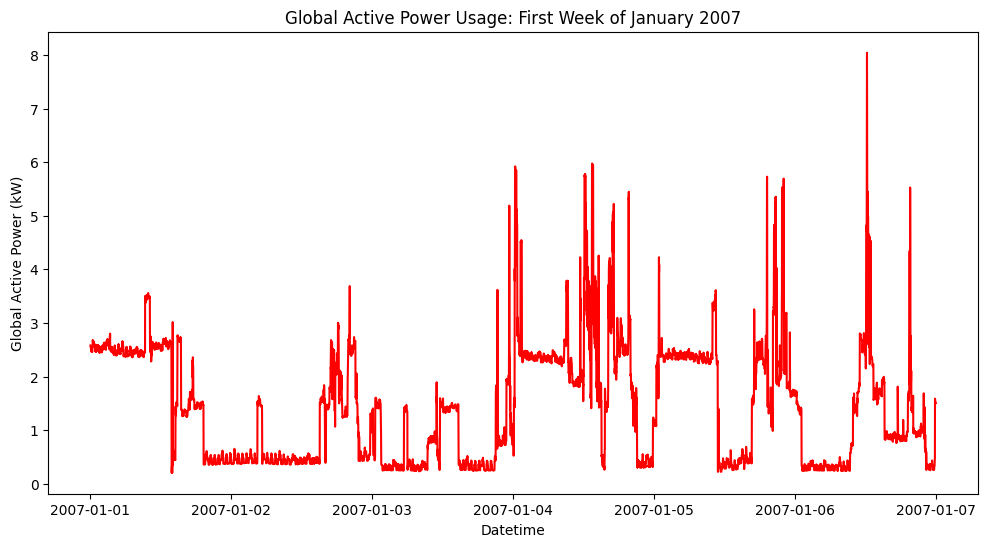

In [8]:
'''
Prompt to the LLM: Write pandas code to plot the `Global_active_power` usage trend for the first week of January 2007.

Details:
- The dataframe is named `df` and is already indexed by datetime (`datetime` is the index).
- Filter the dataframe for rows where the date is between January 1, 2007 and January 7, 2007 (inclusive), and store this filtered dataframe in a variable called `first_week_jan`.
- Create a line plot of `Global_active_power` over time using the `first_week_jan` dataframe.
- Use matplotlib to create the plot and import matplotlib.pyplot as plt
- Set the figure size to 12x6, the line color to red, add a descriptive title, and label both axes.
- Show the plot.

Return only the full, correct code block — no explanations.
'''
import matplotlib.pyplot as plt
first_week_jan = df[(df.index >= '2007-01-01') & (df.index <= '2007-01-07')]
plt.figure(figsize=(12, 6))
plt.plot(first_week_jan['Global_active_power'], color='red')
plt.title('Global Active Power Usage: First Week of January 2007')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power (kW)')
plt.show()

In [9]:
#to check:  Verified that first_week_jan is from January 1–7, 2007, and is non-empty dataset
print(first_week_jan.index.min(), first_week_jan.index.max())

2007-01-01 00:00:00 2007-01-07 00:00:00


In [11]:
print(first_week_jan.shape)

(8641, 7)


##Find the average voltage for each day of the first week of February 2007.

In [12]:
'''
Prompt given to the LLM: Write pandas code to find the average `Voltage` for each day of the first week of February 2007.

Details:
- The dataframe is named `df` and is already indexed by datetime (`datetime` is the index).
- Filter the dataframe for rows where the date is between February 1, 2007 and February 7, 2007 (inclusive), and store this filtered dataframe in a variable named `first_week_feb`.
- Resample `first_week_feb` by day (`'D'`) and calculate the daily mean of `Voltage`.
- Store the result in a variable named `daily_voltage_avg`.
- Print `daily_voltage_avg`.

Return only the full, correct code block — no explanations.
'''
first_week_feb = df[(df.index >= '2007-02-01') & (df.index <= '2007-02-07')]
daily_voltage_avg = first_week_feb['Voltage'].resample('D').mean()
print(daily_voltage_avg)

datetime
2007-02-01    240.392139
2007-02-02    240.334389
2007-02-03    238.910194
2007-02-04    239.633333
2007-02-05    240.810312
2007-02-06    241.264160
2007-02-07    243.530000
Freq: D, Name: Voltage, dtype: float64


In [14]:
#to check: correctly added the dates in the first_week_feb; the daily_voltage_avg is consistent with the values being 240 V~
print(first_week_feb.index.min(), first_week_feb.index.max())
print(daily_voltage_avg.describe())

2007-02-01 00:00:00 2007-02-07 00:00:00
count      7.000000
mean     240.696361
std        1.466793
min      238.910194
25%      239.983861
50%      240.392139
75%      241.037236
max      243.530000
Name: Voltage, dtype: float64


##What is the correlation between global active power and sub-metering values?

In [16]:
'''
Prompt to the LLM: Write pandas code to calculate and display the correlation matrix between `Global_active_power` and the three sub-metering columns: `Sub_metering_1`, `Sub_metering_2`, and `Sub_metering_3`.

Details:
- The dataframe is named `df` and is already indexed by datetime (`datetime` is the index).
- Create a list of columns: `['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']`.
- Select these columns from `df` and store them in a variable named `selected_cols`.
- Use pandas `.corr()` method to compute the correlation matrix and store it in a variable named `correlation_matrix`.
- Print `correlation_matrix`.

Return only the full, correct code block — no explanations.
'''
selected_cols = ['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
correlation_matrix = df[selected_cols].corr()
print(correlation_matrix)

                     Global_active_power  Sub_metering_1  Sub_metering_2  \
Global_active_power             1.000000        0.484401        0.434569   
Sub_metering_1                  0.484401        1.000000        0.054721   
Sub_metering_2                  0.434569        0.054721        1.000000   
Sub_metering_3                  0.638555        0.102571        0.080872   

                     Sub_metering_3  
Global_active_power        0.638555  
Sub_metering_1             0.102571  
Sub_metering_2             0.080872  
Sub_metering_3             1.000000  


In [20]:
#to check: no NaNs and the values should be between -1 to 1 as we know for the case of correlation matrix
print(df[selected_cols].isna().sum())


Global_active_power    0
Sub_metering_1         0
Sub_metering_2         0
Sub_metering_3         0
dtype: int64


In [21]:
print(correlation_matrix.min().min(), correlation_matrix.max().max())

0.05472086432348112 1.0
